#Data science project lifecycle
# 1. Problem Definition and Data Collection:
- Identify the problem or opportunity to be addressed.
- Gather relevant data from various sources.
- Clean and prepare the data for analysis.

# 2. Data Exploration and Analysis:
- Perform exploratory data analysis (EDA) to understand the data characteristics.
- Visualize the data to identify patterns and trends.
- Use statistical methods to summarize and describe the data.

# 3. Model Building and Training:
- Choose appropriate machine learning algorithms based on the problem type.
- Train the models on the prepared data.
- Evaluate the performance of the trained models.

# 4. Model Deployment and Evaluation:
- Deploy the best-performing model to a production environment.
- Monitor the performance of the deployed model and track its impact.
- Regularly evaluate the model's accuracy and make necessary adjustments.

# 5. Communication and Reporting:
- Present the findings and insights from the data analysis and modeling.
- Create clear and concise reports to communicate the results to stakeholders.
- Engage with stakeholders to gather feedback and refine the project outcomes.

# 6. Maintenance and Improvement:
- Continuously monitor the data and model performance over time.
- Update the model with new data and refine the algorithms as needed.
- Stay up-to-date with the latest advancements in data science and machine learning.

Dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
dataset = pd.read_csv('train.csv')

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In data analysis, EDA (Exploratory Data Analysis) involves examining and summarizing the main characteristics of a dataset to better understand its structure, identify patterns and relationships, and detect any anomalies or outliers. Here are some key steps and tasks commonly performed during EDA:

1. Data Cleaning:
   - Check for missing values and impute them appropriately.
    - Handle outliers and extreme values.
   - Correct any inconsistencies or errors in the data.

 2. Data Description:
    - Calculate basic statistics like mean, median, standard deviation, and quartiles for each variable.
    - Identify the data types (e.g., numerical, categorical, ordinal, etc.) and their distributions.
    - Explore the relationships between different variables using correlation coefficients or scatter plots.

 3. Visualization:
    - Create histograms, box plots, and density plots to visualize the distribution of each variable.
    - Use scatter plots and heatmaps to visualize the relationships between different variables.
    - Generate pie charts and bar charts to visualize categorical data.

 4. Dimensionality Reduction:
    - Use techniques like principal component analysis (PCA) or t-distributed stochastic neighbor embedding (t-SNE) to reduce the dimensionality of the data while preserving important information.

 5. Outlier Detection:
    - Identify outliers using statistical methods like the z-score or interquartile range (IQR) method.
    - Investigate outliers to understand their origin and impact on the analysis.

 6. Feature Selection:
    - Evaluate the importance of each feature for the analysis using techniques like correlation analysis, chi-square test, or ANOVA.
    - Select a subset of relevant features that contribute most significantly to the analysis.

 7. Data Transformation:
    - Transform the data as needed to improve the analysis, such as normalizing numerical variables or encoding categorical variables.

 8. Hypothesis Testing:
    - Conduct statistical tests to check for significant relationships between variables or to test specific hypotheses about the data.

 9. Interpretation and Reporting:
    - Summarize the key findings and insights from the EDA in a clear and concise manner.
    - Create visualizations and reports to communicate the results to stakeholders.

 By performing EDA, data analysts gain a deeper understanding of the data, identify potential problems or opportunities, and prepare the data for further modeling and analysis.

#Data Cleaning

1. **Check for Missing Values:**
2. **Handle Outliers:**
3. **Correct Inconsistent Data:**
4. **Standardize Data Formats:**
5. **Merge and Join Datasets:**
6. **Reshape Data:**
7. **Validating and Profiling Data:**

In [5]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.5973  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


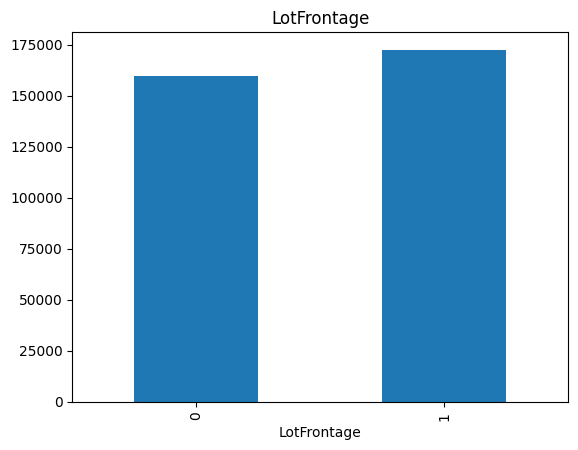

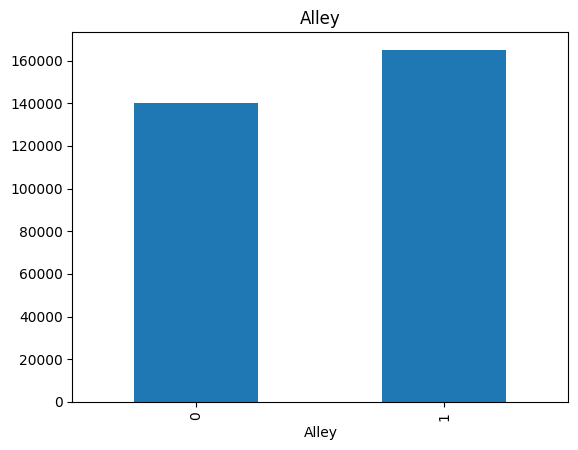

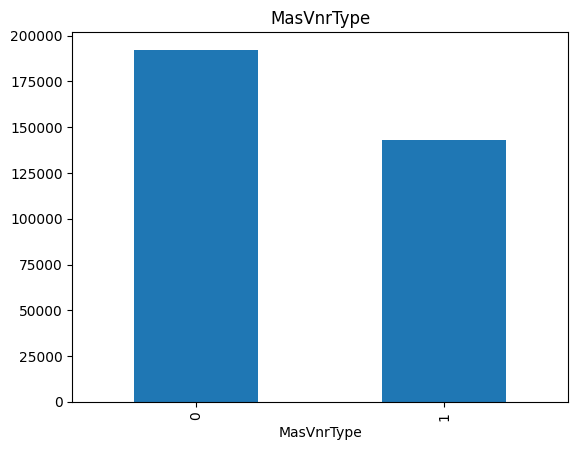

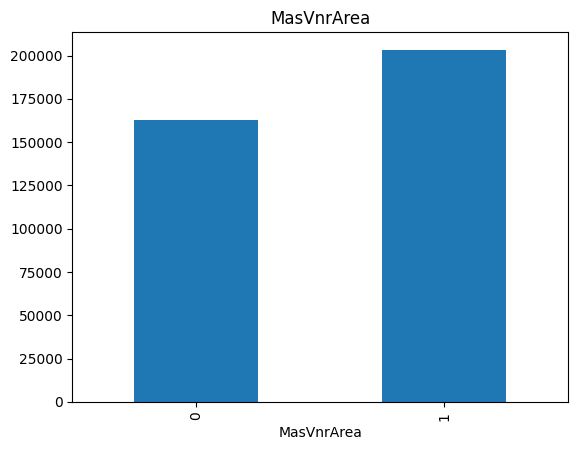

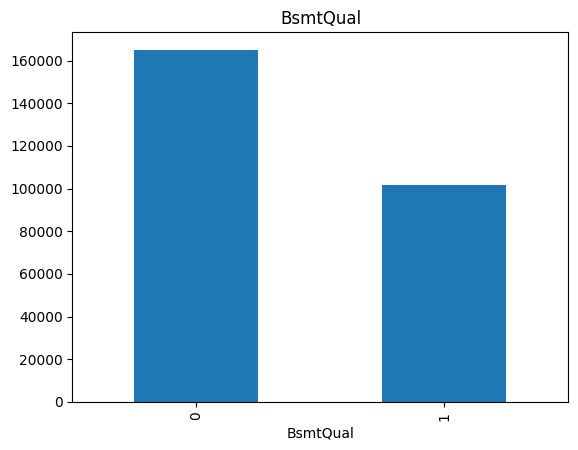

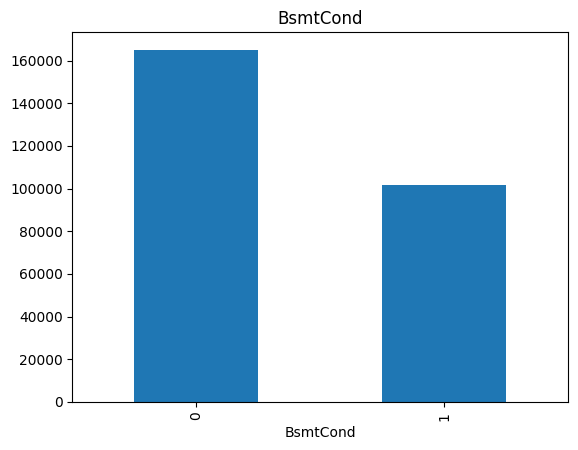

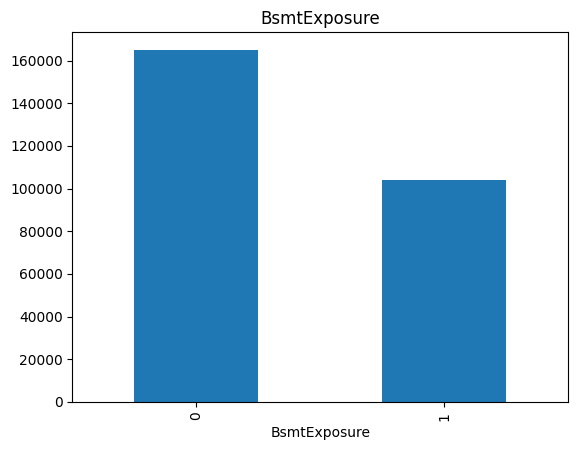

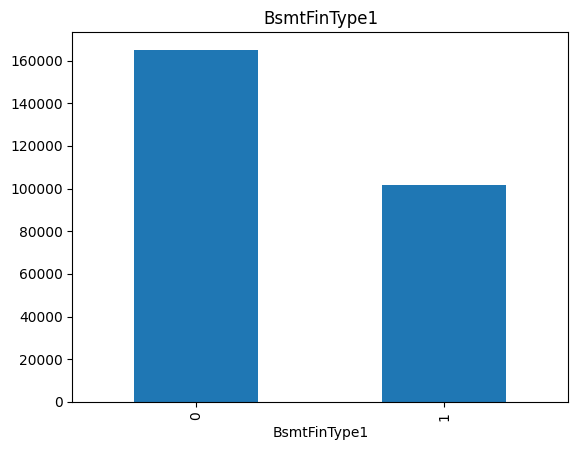

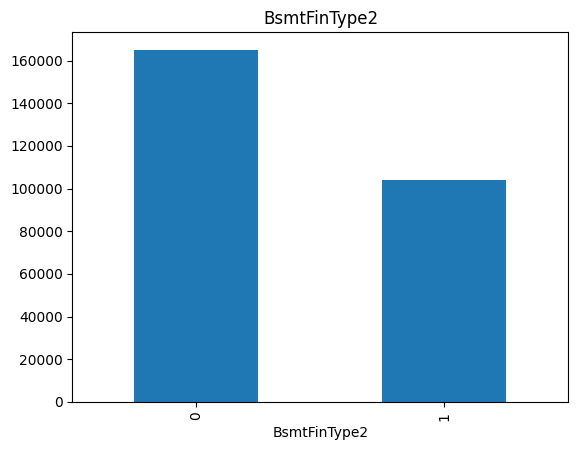

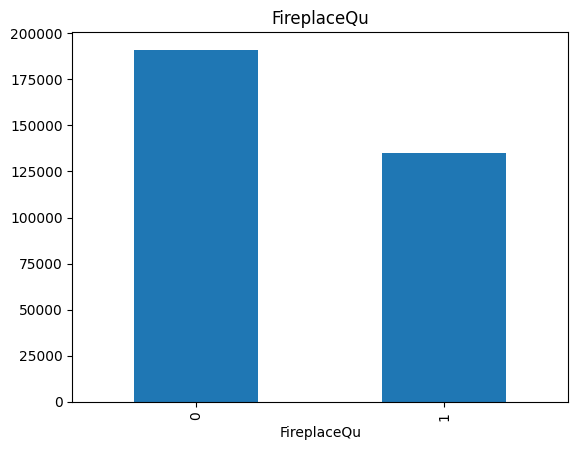

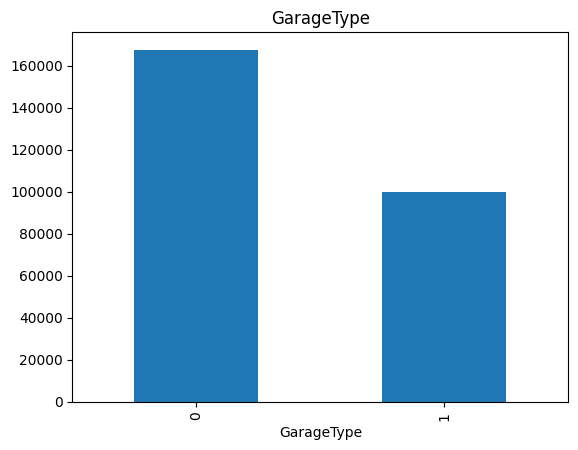

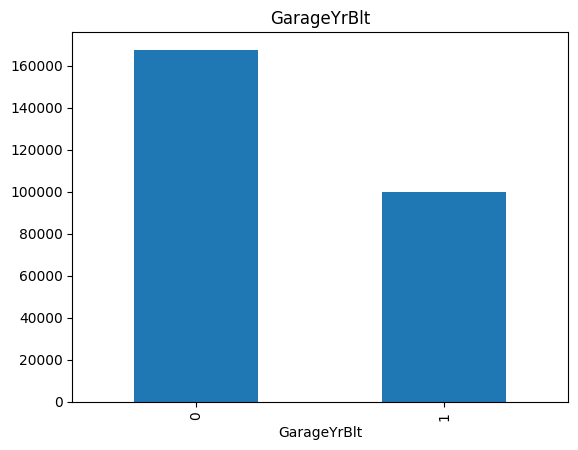

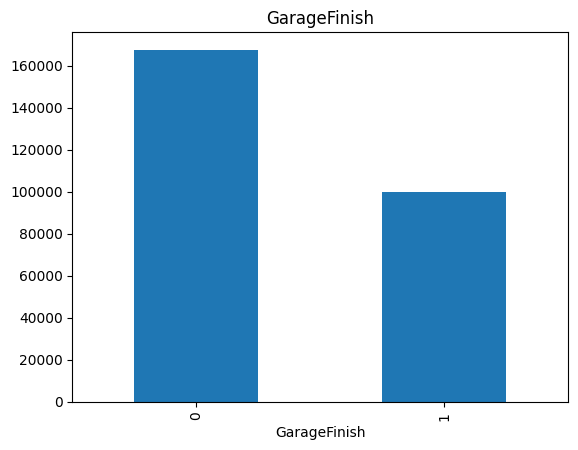

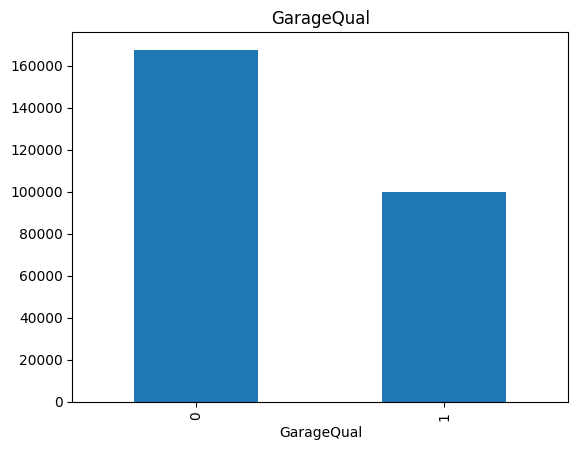

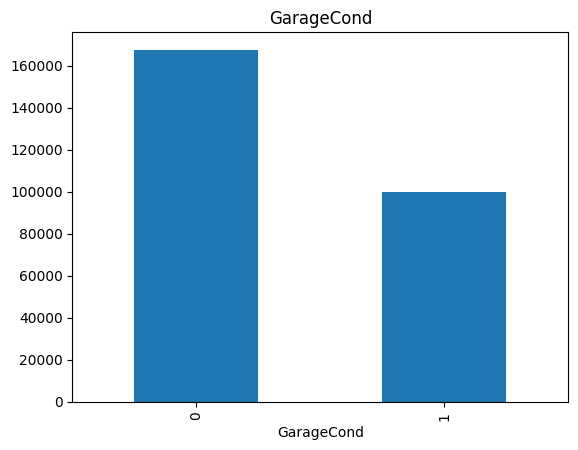

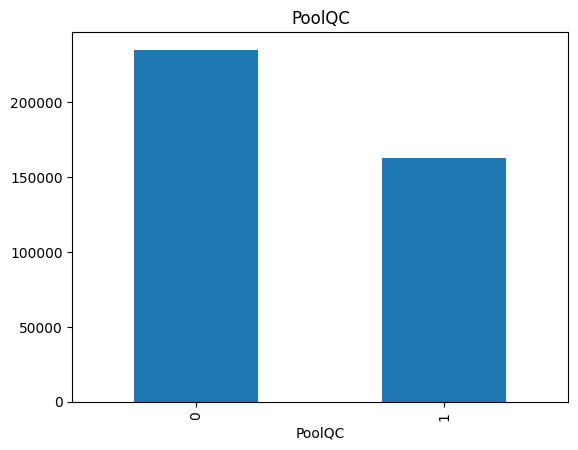

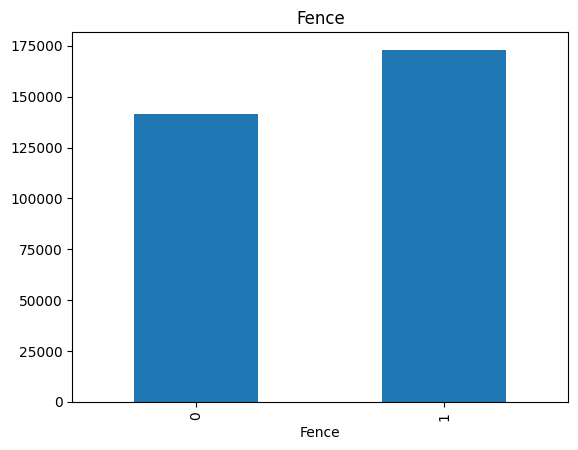

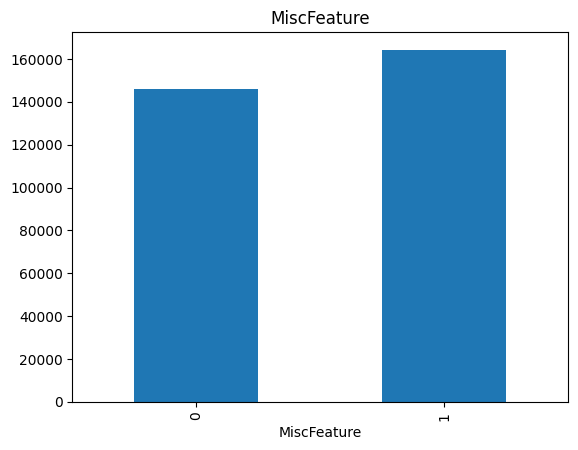

In [6]:
for feature in features_with_na:
  data=dataset.copy()

  data[feature]=np.where(data[feature].isnull(),1,0)
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.title(feature)
  plt.show()


In [7]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

dataset[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
year_feature= [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [9]:
for feature in year_feature:
  print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

<Axes: xlabel='YrSold'>

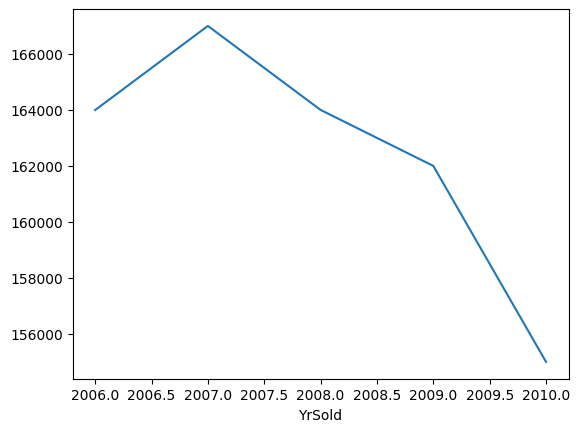

In [10]:
dataset.groupby('YrSold')['SalePrice'].median().plot()

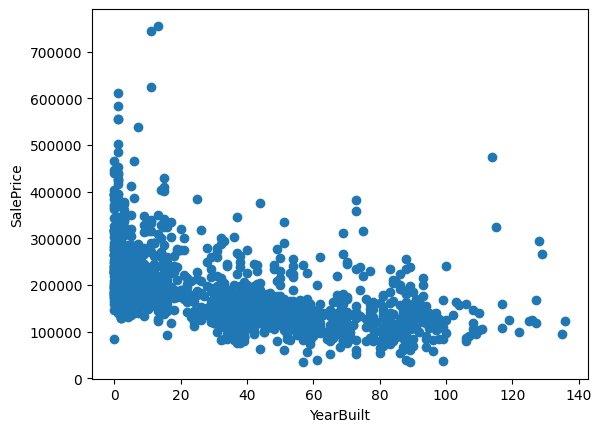

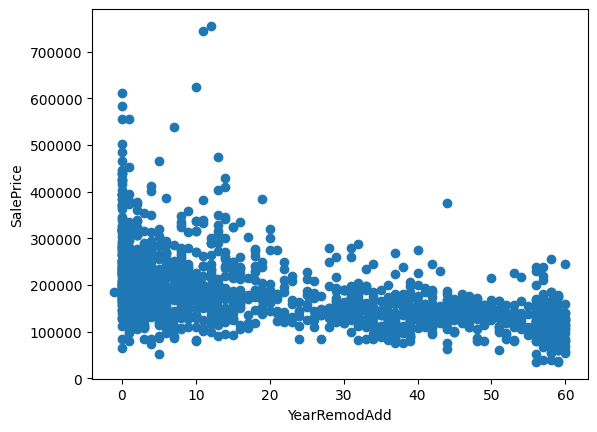

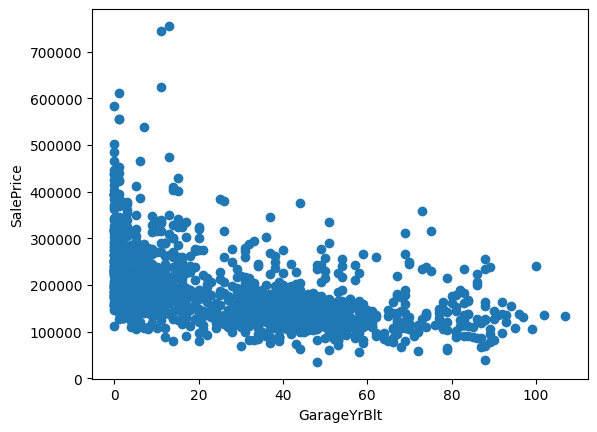

In [11]:
for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()

        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


### Discrete Variables

In [32]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

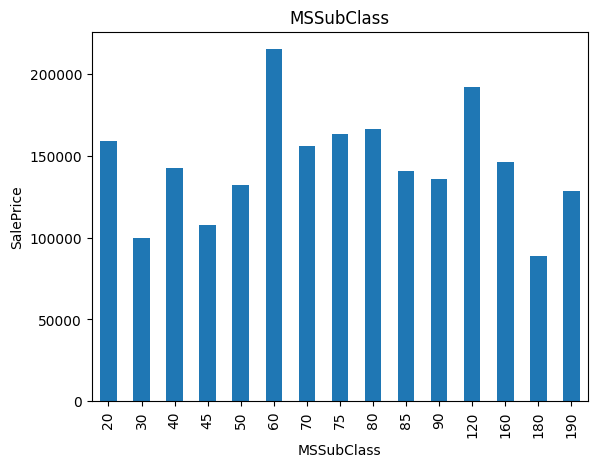

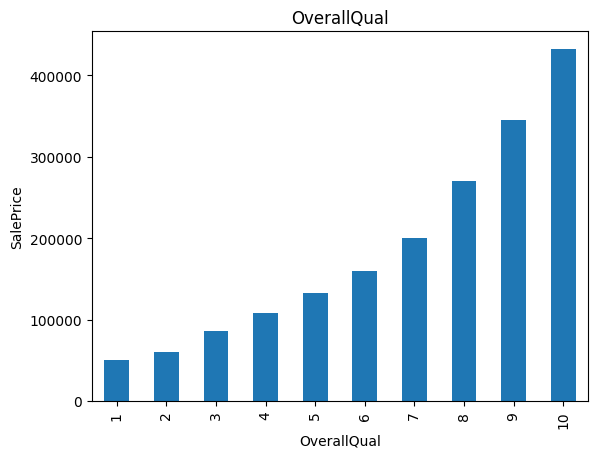

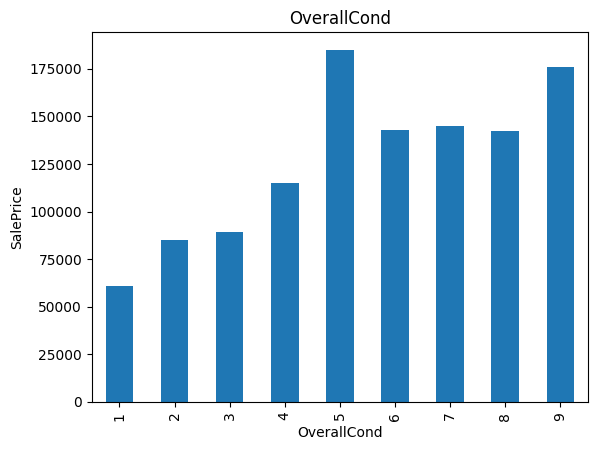

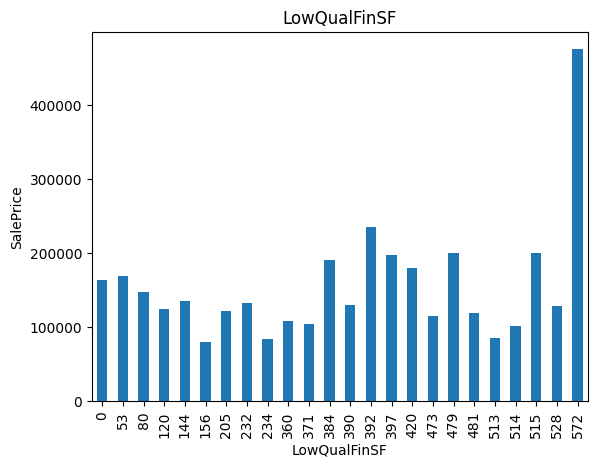

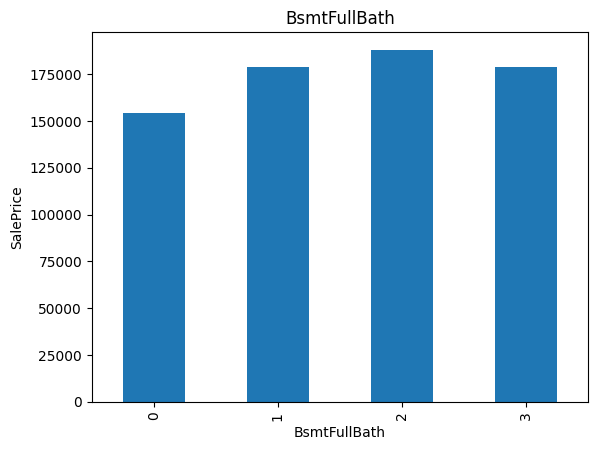

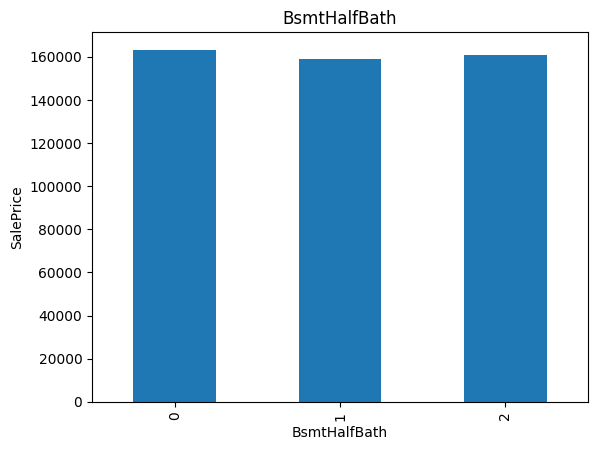

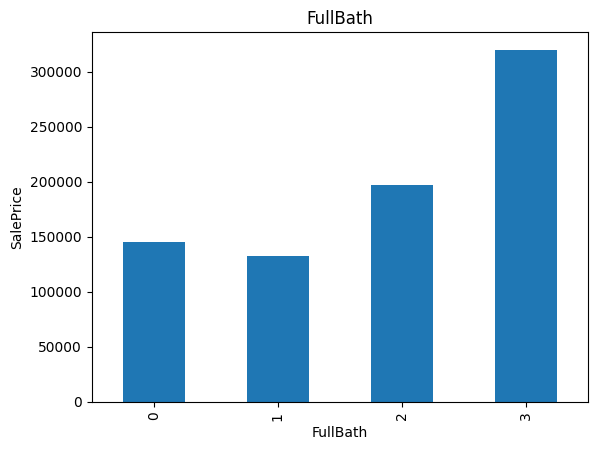

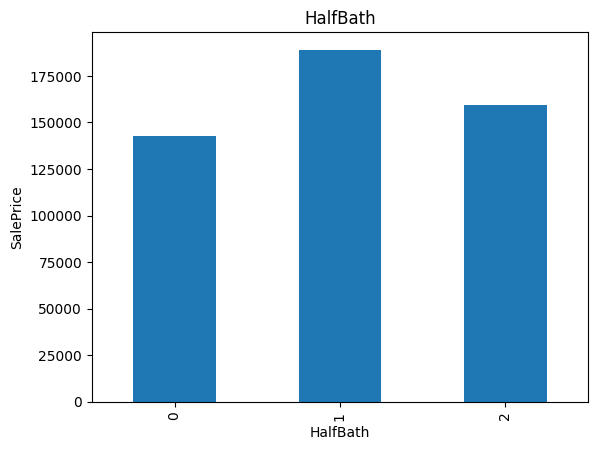

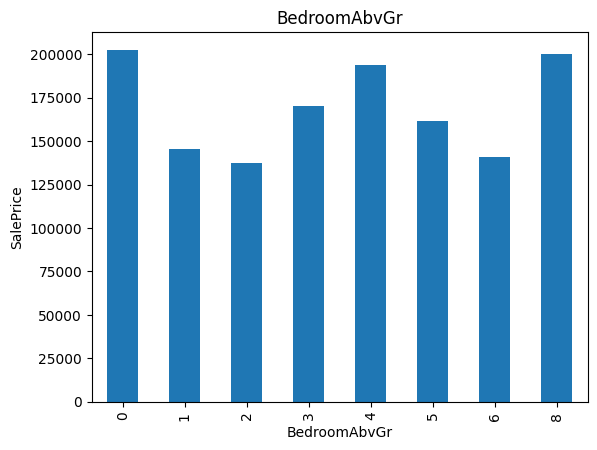

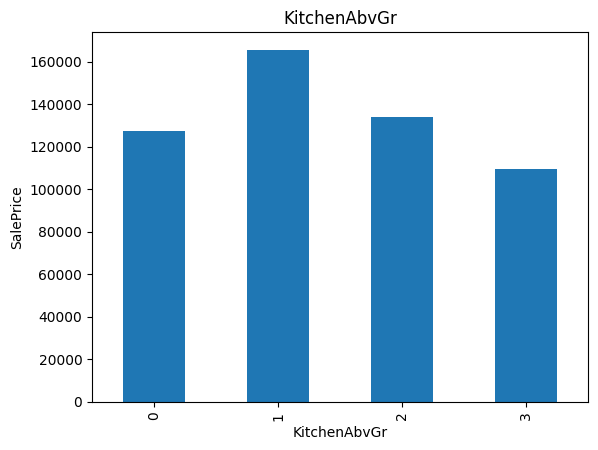

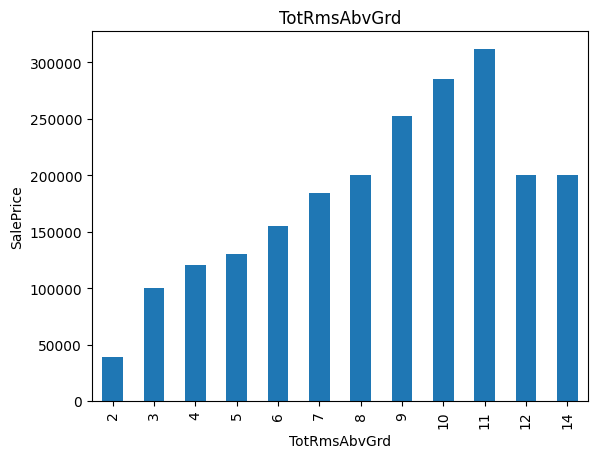

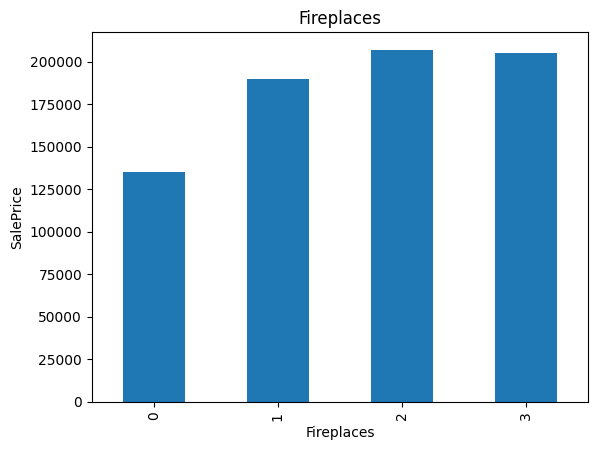

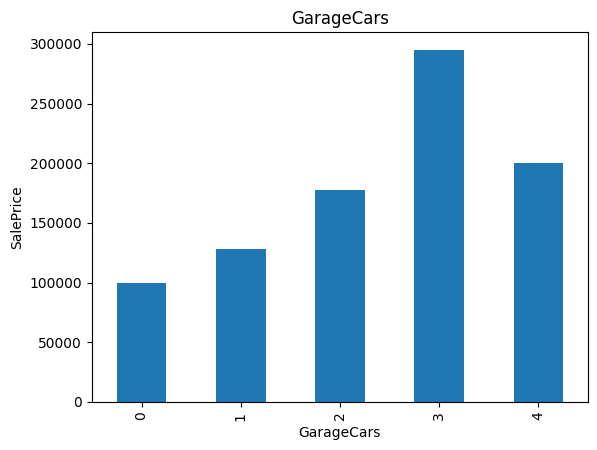

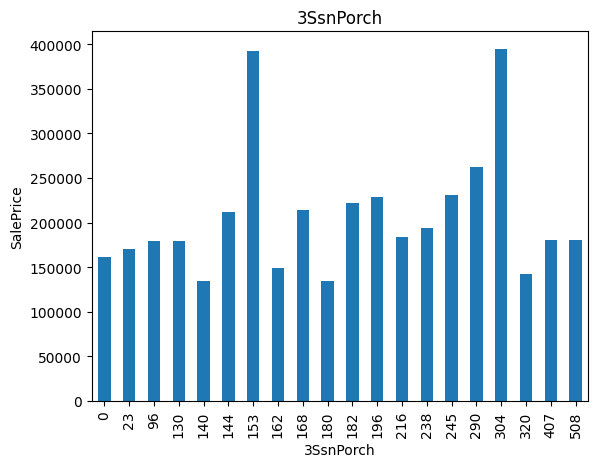

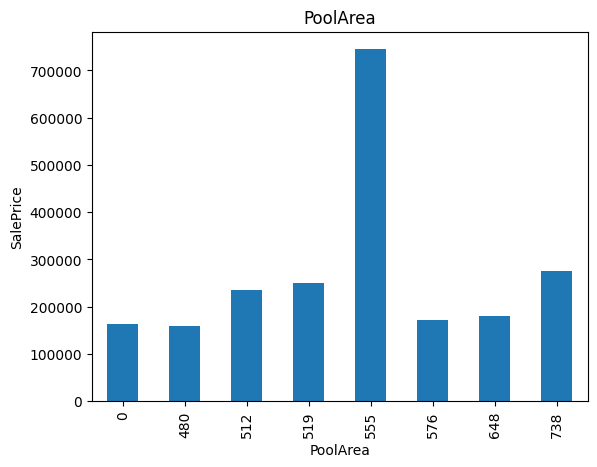

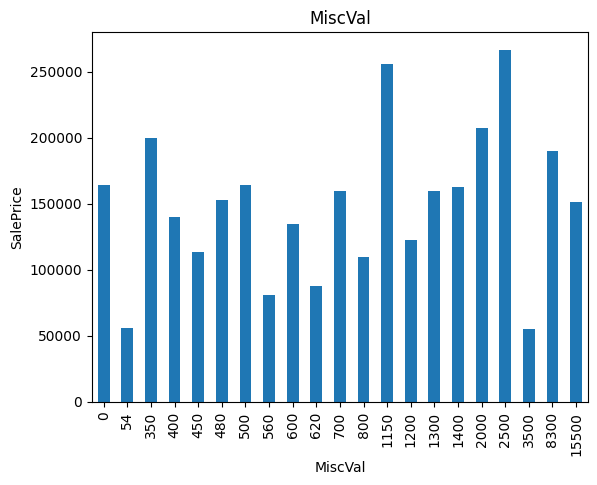

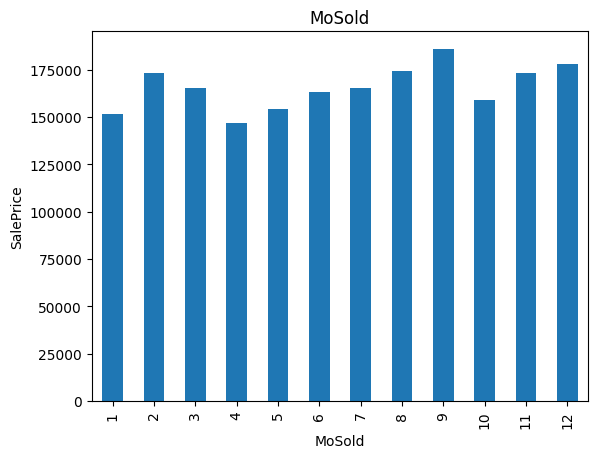

In [33]:
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [13]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


### Continuous Variables

In [14]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


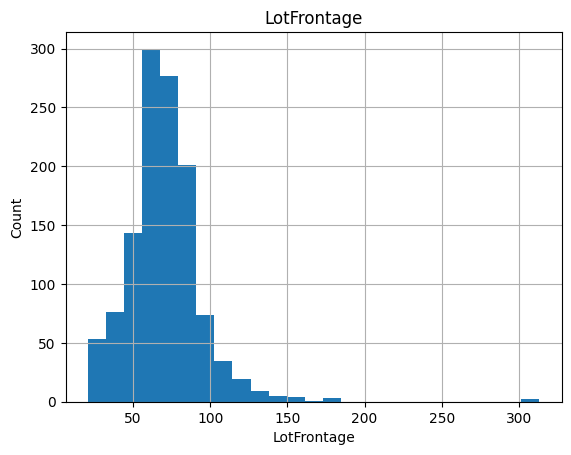

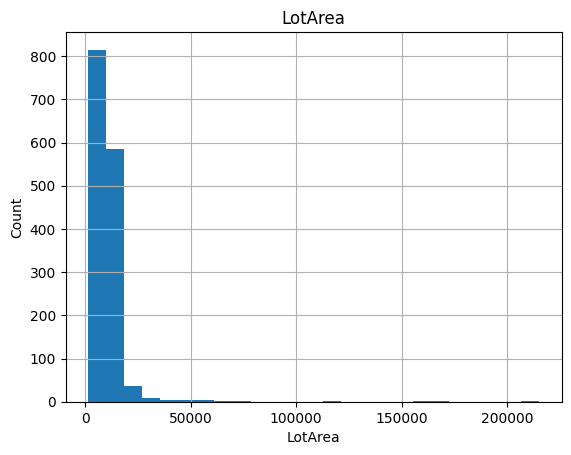

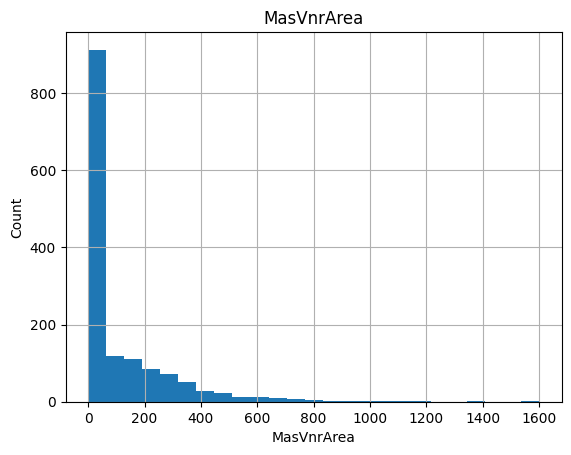

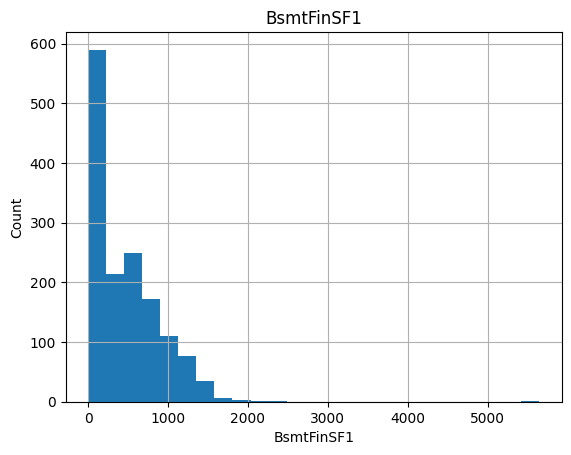

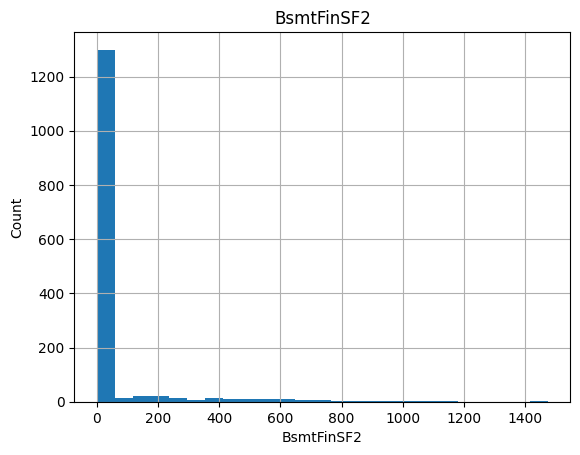

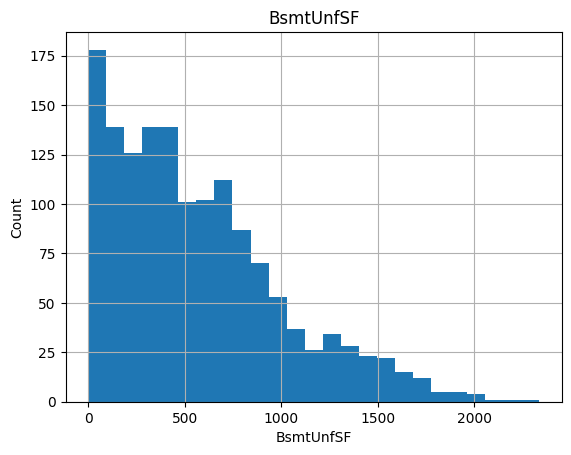

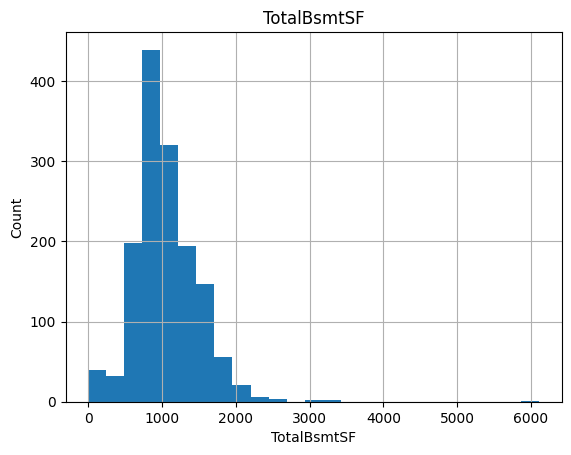

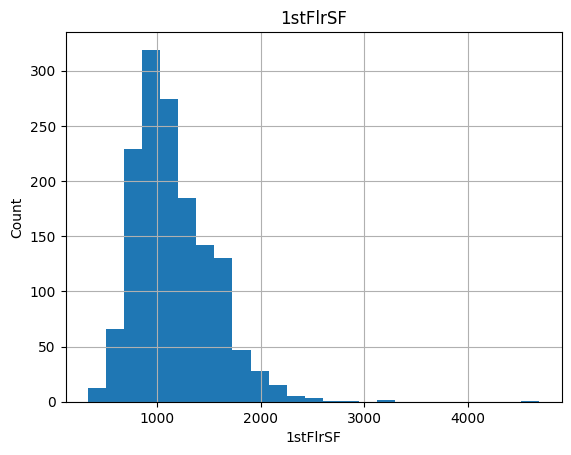

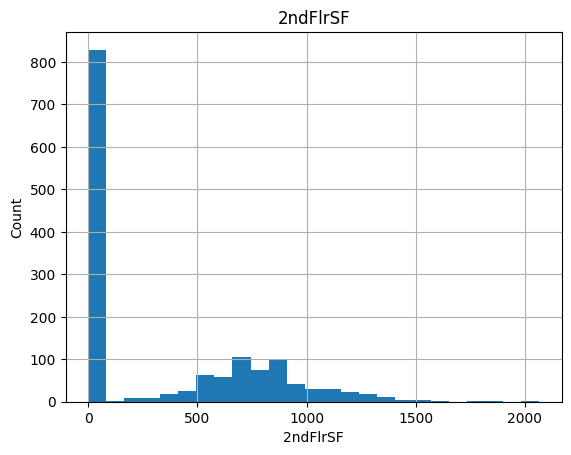

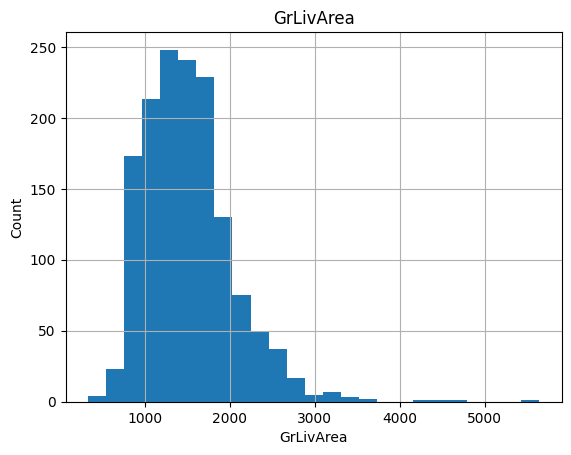

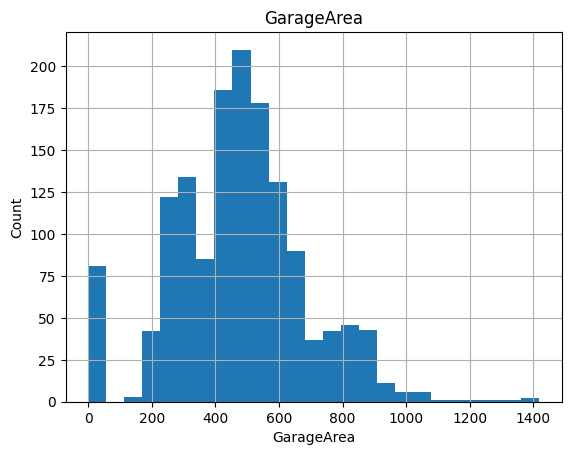

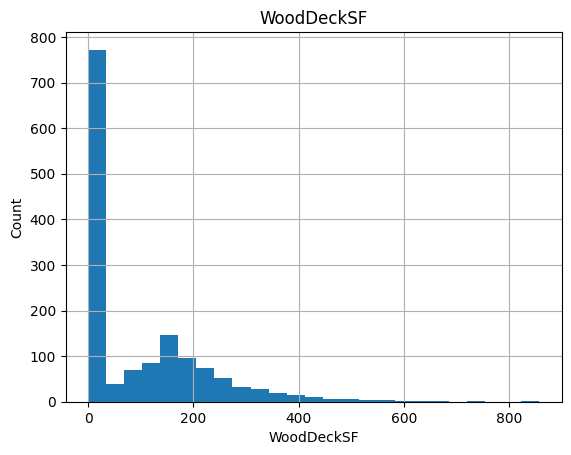

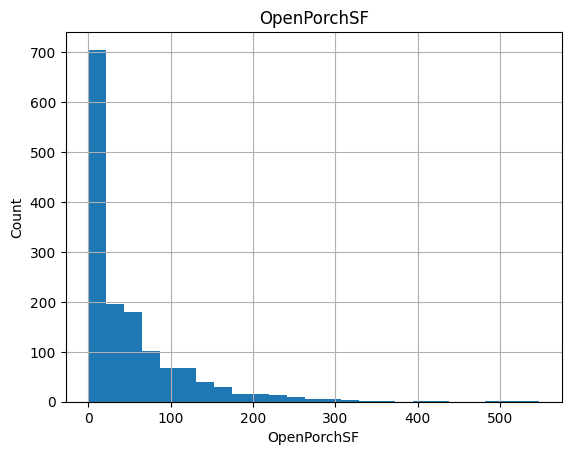

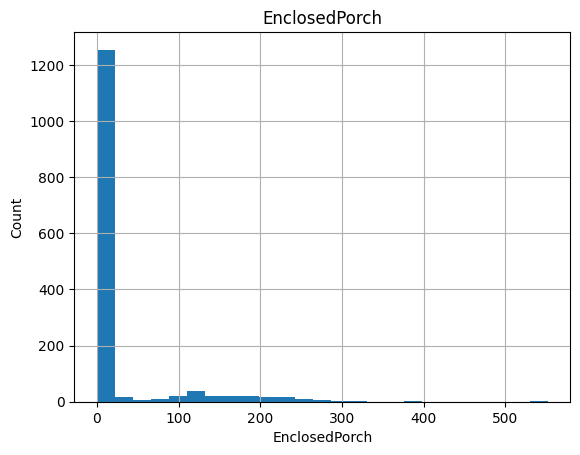

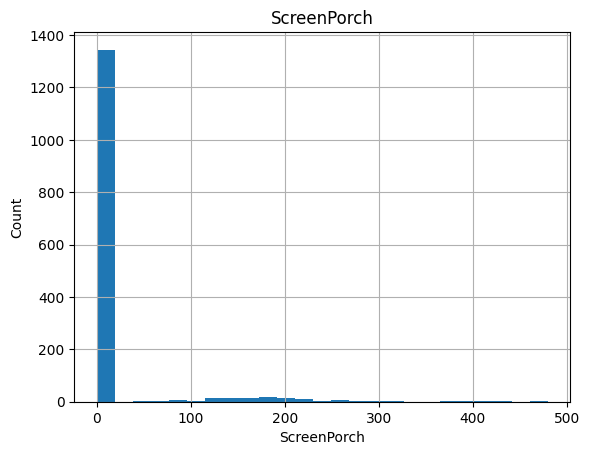

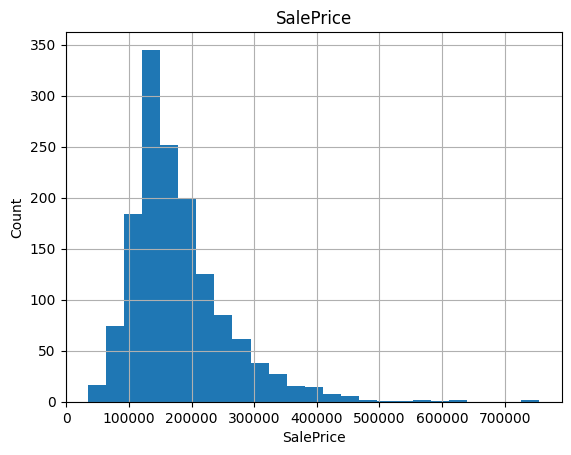

In [15]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Data seems skewed. Have to Normalize

In [16]:
data=dataset.copy()

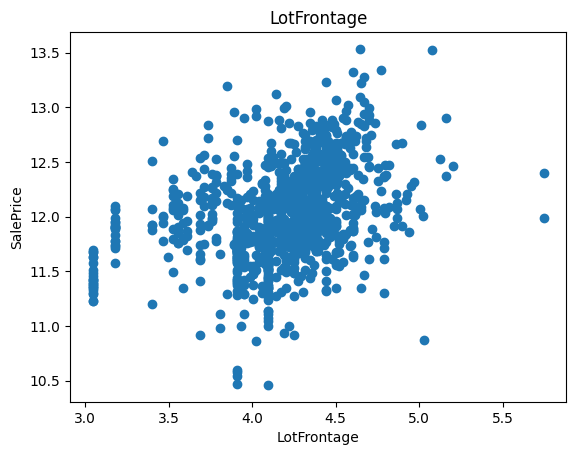

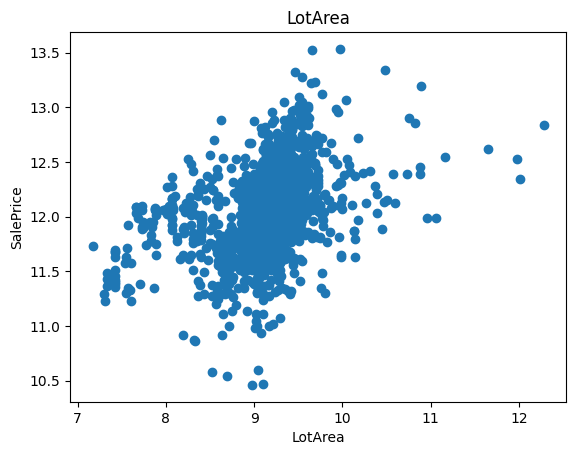

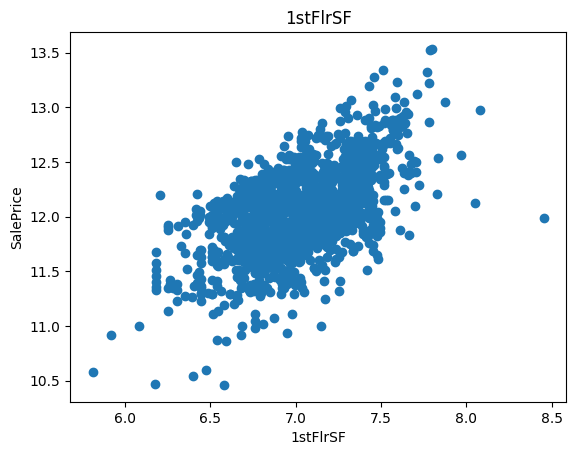

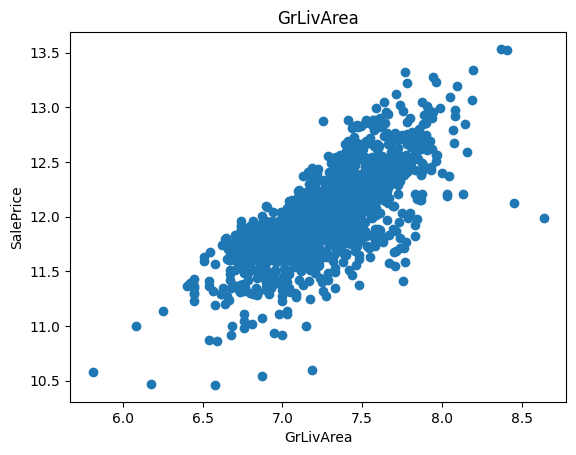

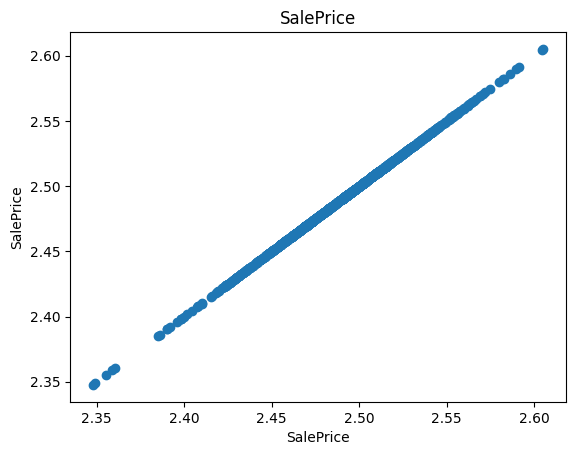

In [19]:
for feature in continuous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data['SalePrice']=np.log(data['SalePrice'])
    plt.scatter(data[feature],data['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

##Outliers

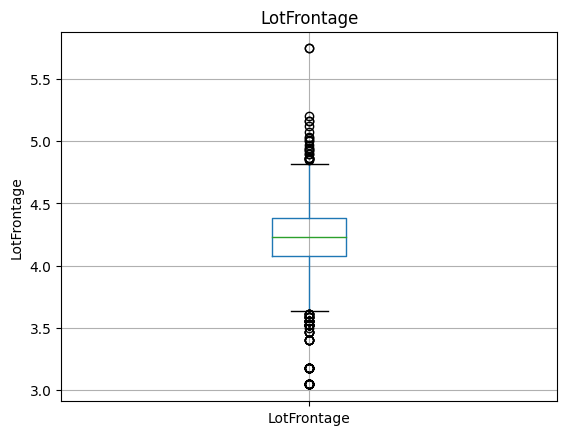

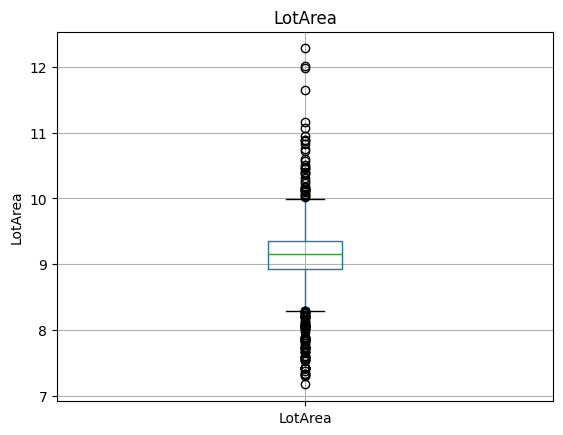

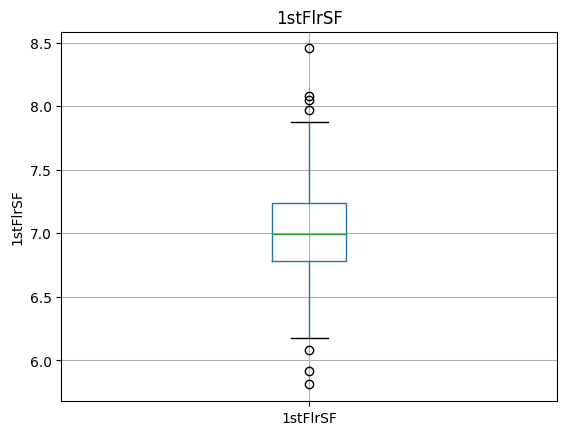

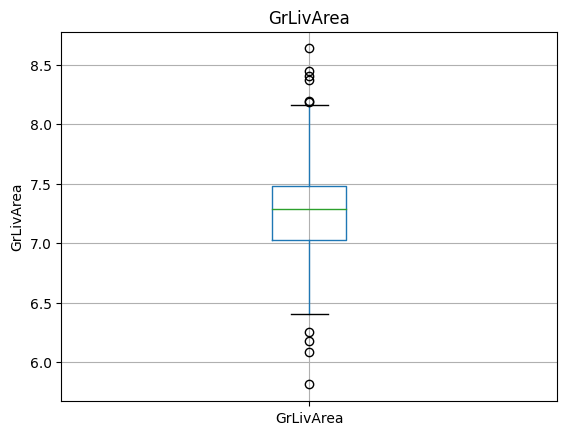

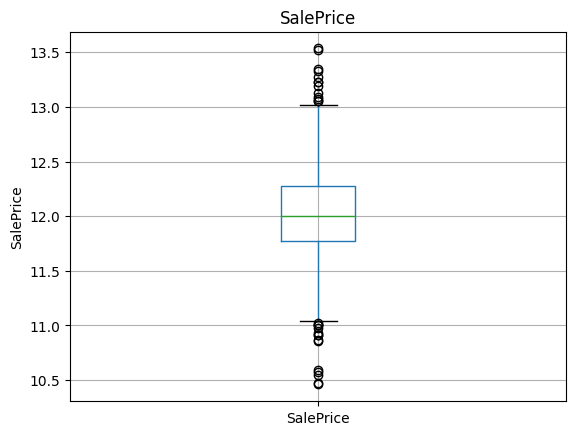

In [21]:
for feature in continuous_feature:
  data=dataset.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


In [23]:
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
for feature in categorical_features:
  print('For feature = {},  number of categories = {}'.format(feature,dataset[feature].unique()))

For feature = MSZoning,  number of categories = ['RL' 'RM' 'C (all)' 'FV' 'RH']
For feature = Street,  number of categories = ['Pave' 'Grvl']
For feature = Alley,  number of categories = [nan 'Grvl' 'Pave']
For feature = LotShape,  number of categories = ['Reg' 'IR1' 'IR2' 'IR3']
For feature = LandContour,  number of categories = ['Lvl' 'Bnk' 'Low' 'HLS']
For feature = Utilities,  number of categories = ['AllPub' 'NoSeWa']
For feature = LotConfig,  number of categories = ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
For feature = LandSlope,  number of categories = ['Gtl' 'Mod' 'Sev']
For feature = Neighborhood,  number of categories = ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
For feature = Condition1,  number of categories = ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe

In [27]:
for feature in categorical_features:
  print('For feature = {},  number of categories = {}'.format(feature,len(dataset[feature].unique())))

For feature = MSZoning,  number of categories = 5
For feature = Street,  number of categories = 2
For feature = Alley,  number of categories = 3
For feature = LotShape,  number of categories = 4
For feature = LandContour,  number of categories = 4
For feature = Utilities,  number of categories = 2
For feature = LotConfig,  number of categories = 5
For feature = LandSlope,  number of categories = 3
For feature = Neighborhood,  number of categories = 25
For feature = Condition1,  number of categories = 9
For feature = Condition2,  number of categories = 8
For feature = BldgType,  number of categories = 5
For feature = HouseStyle,  number of categories = 8
For feature = RoofStyle,  number of categories = 6
For feature = RoofMatl,  number of categories = 8
For feature = Exterior1st,  number of categories = 15
For feature = Exterior2nd,  number of categories = 16
For feature = MasVnrType,  number of categories = 4
For feature = ExterQual,  number of categories = 4
For feature = ExterCond,  

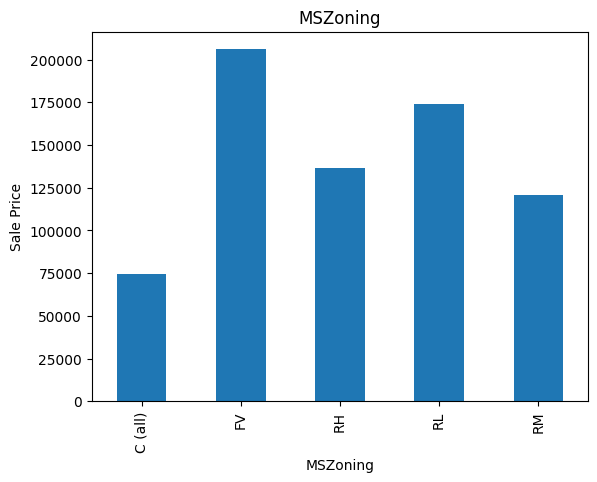

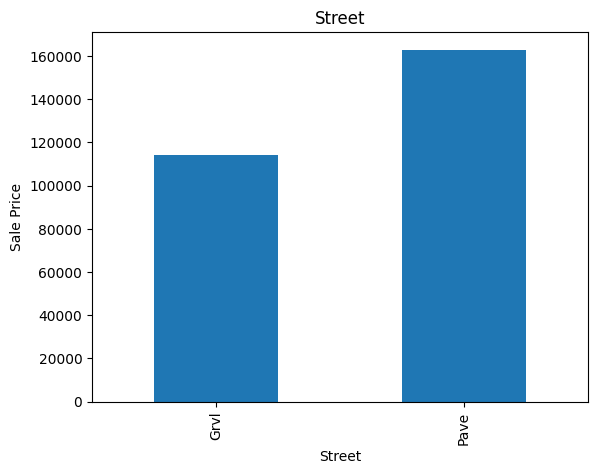

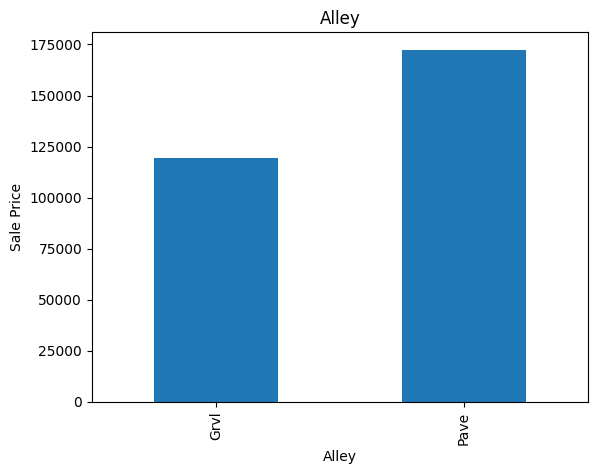

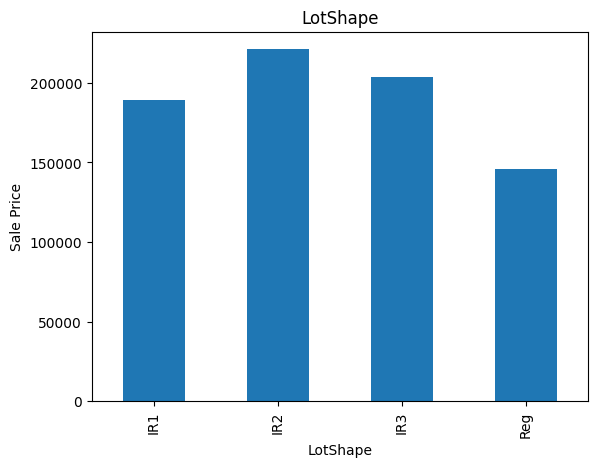

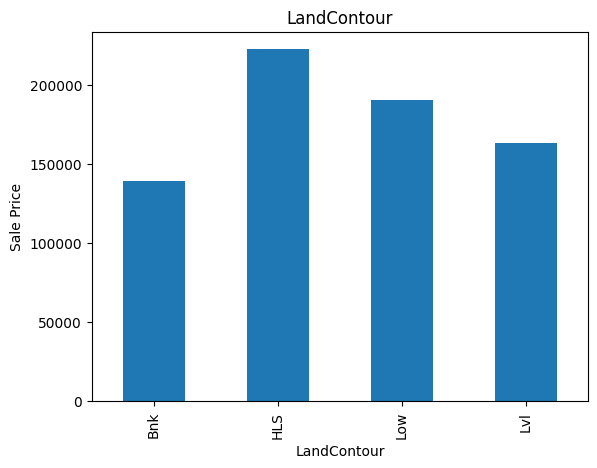

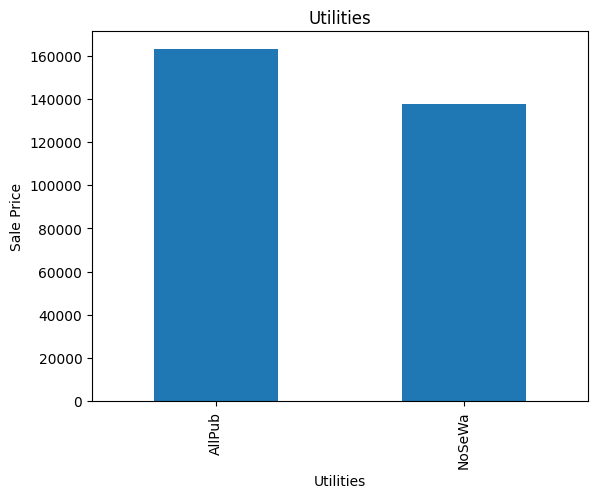

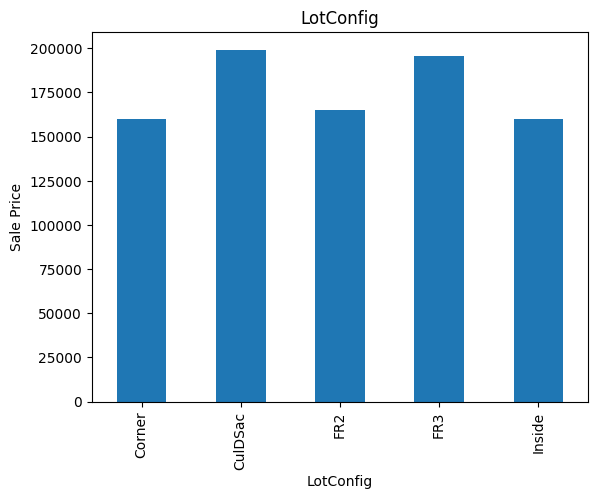

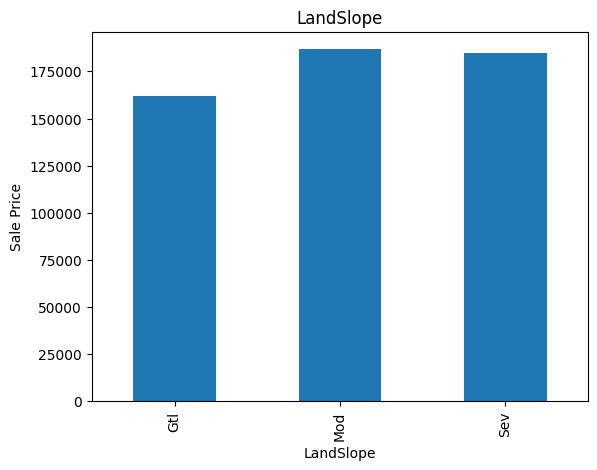

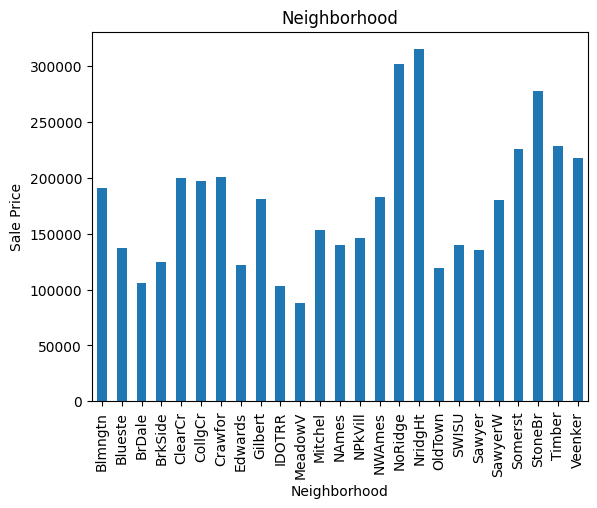

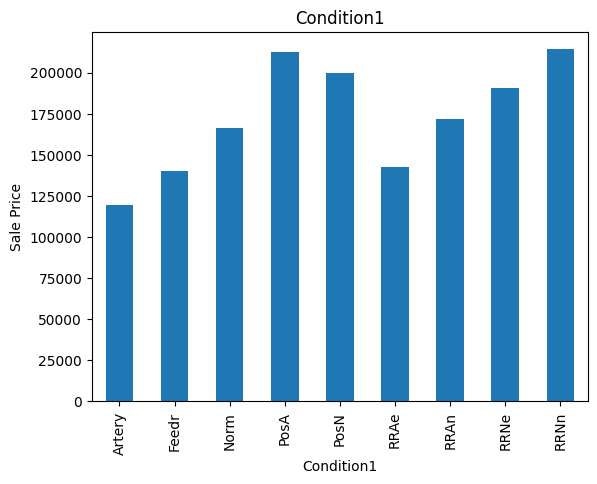

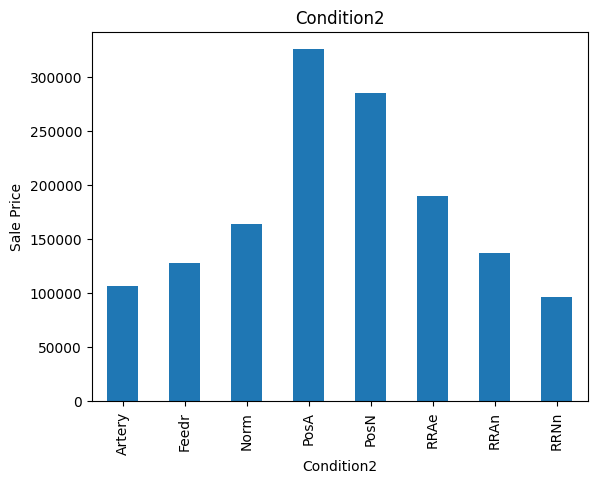

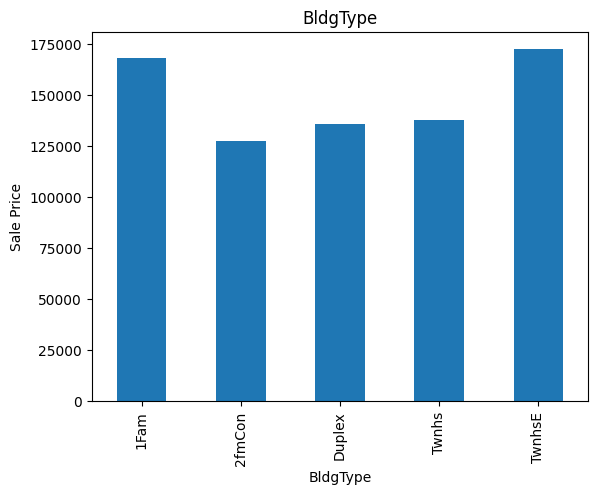

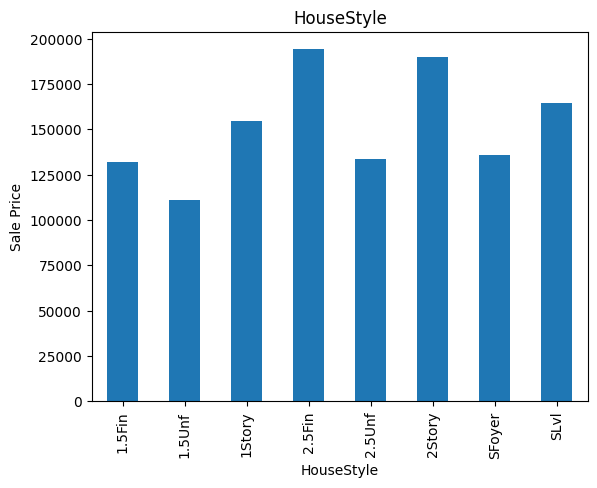

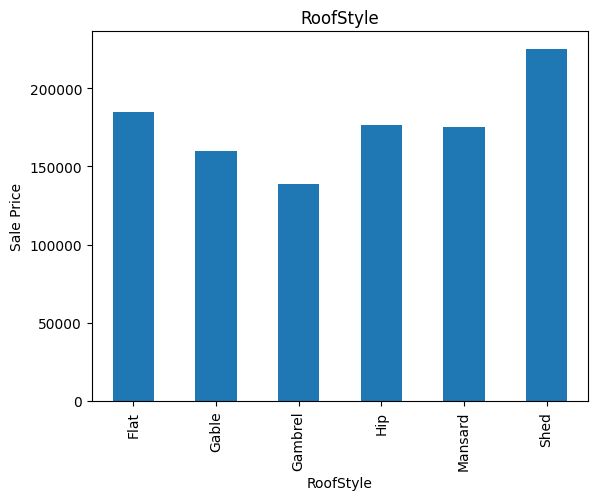

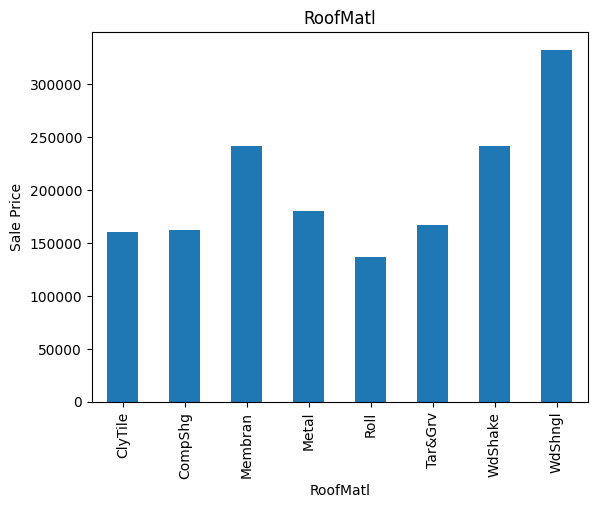

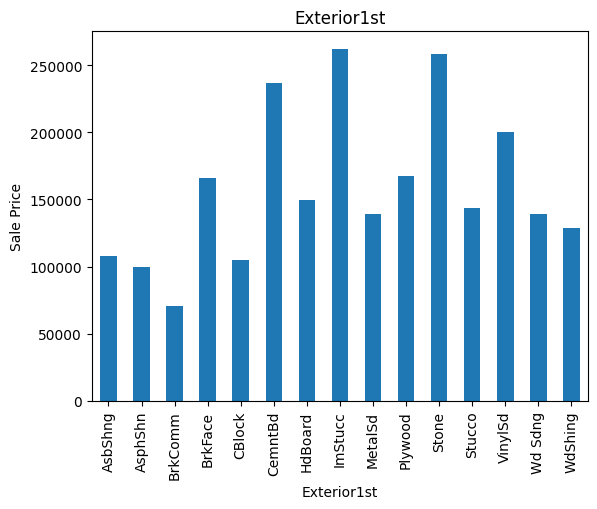

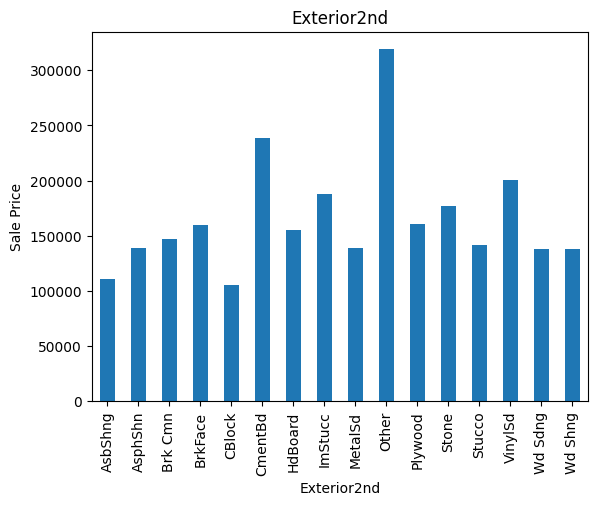

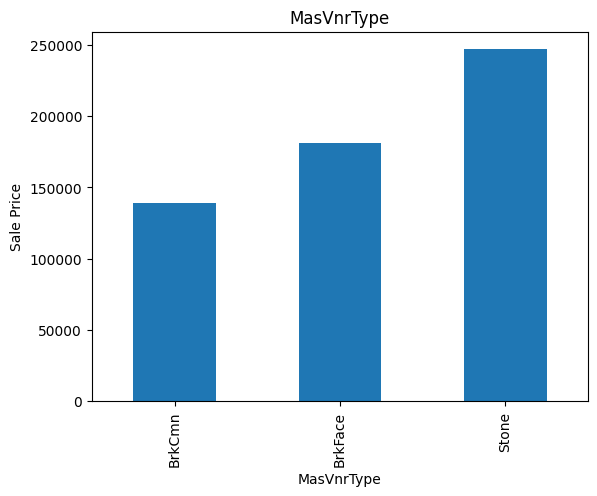

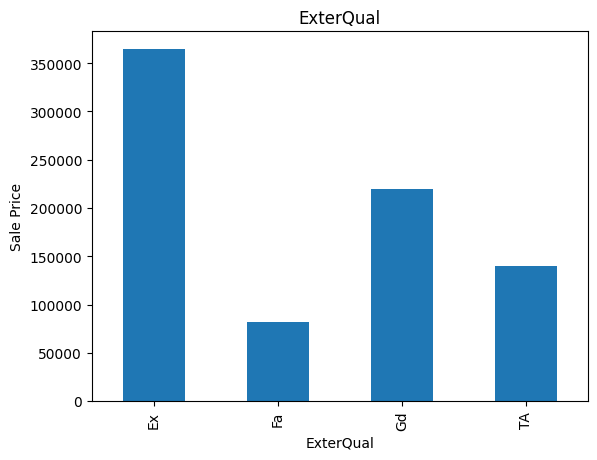

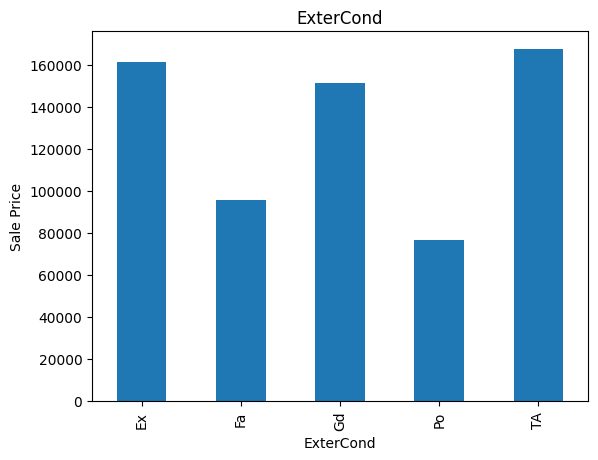

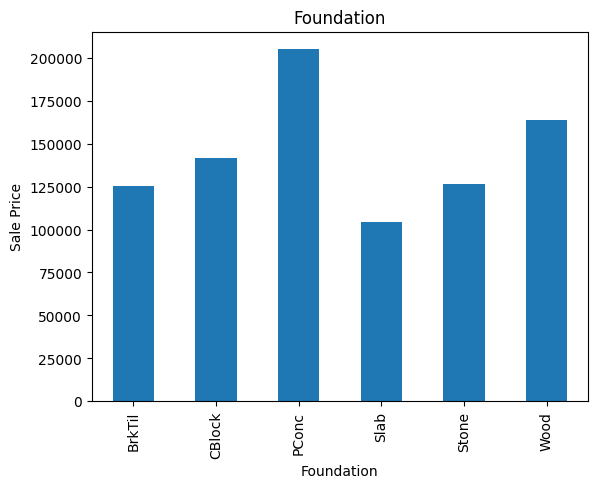

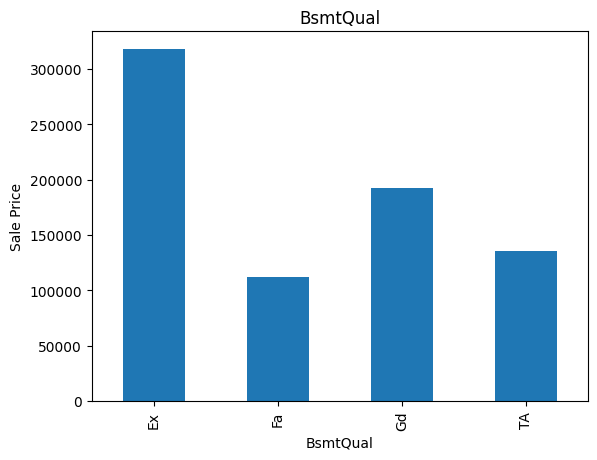

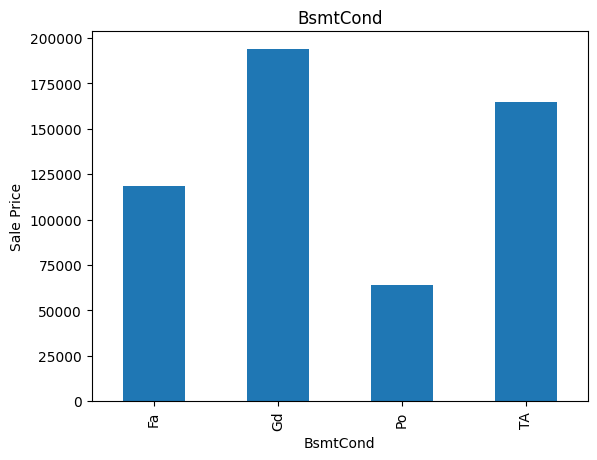

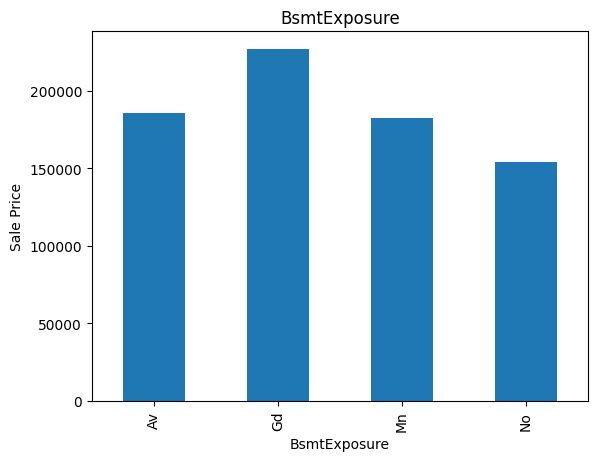

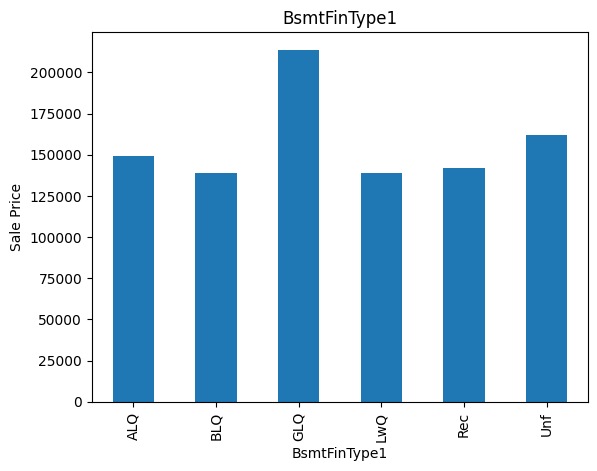

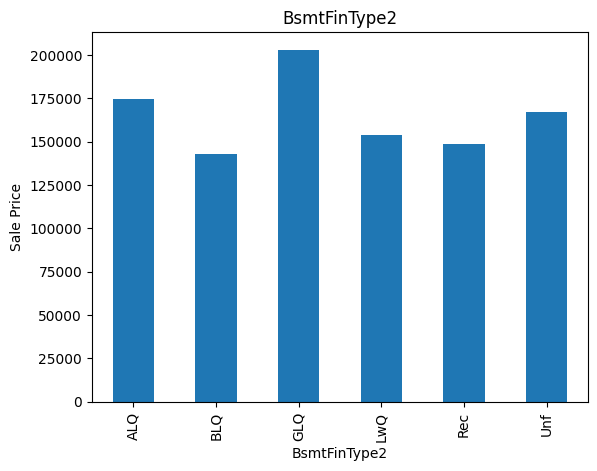

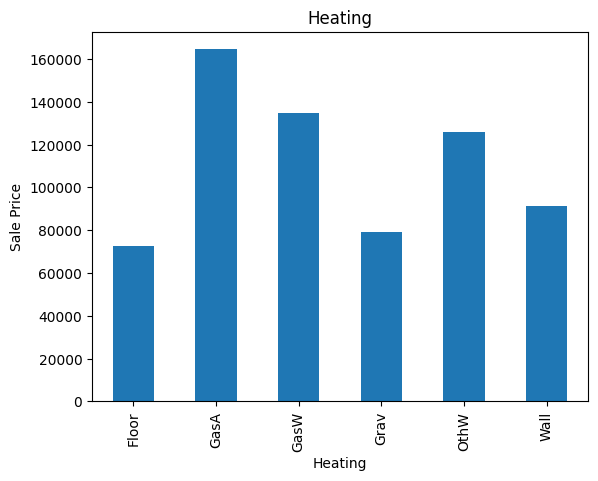

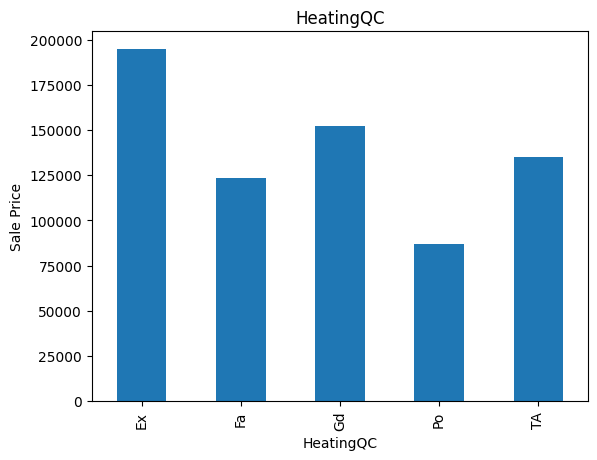

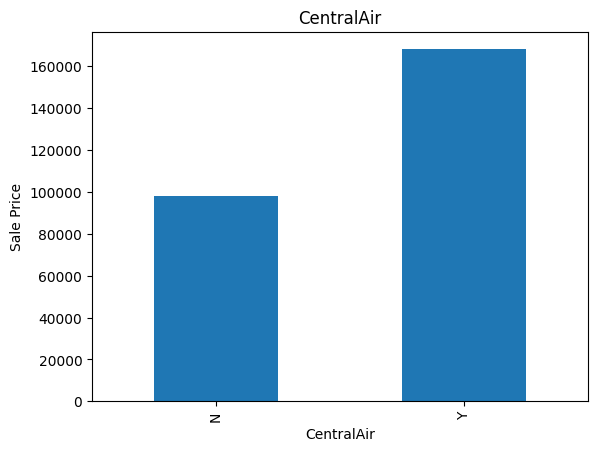

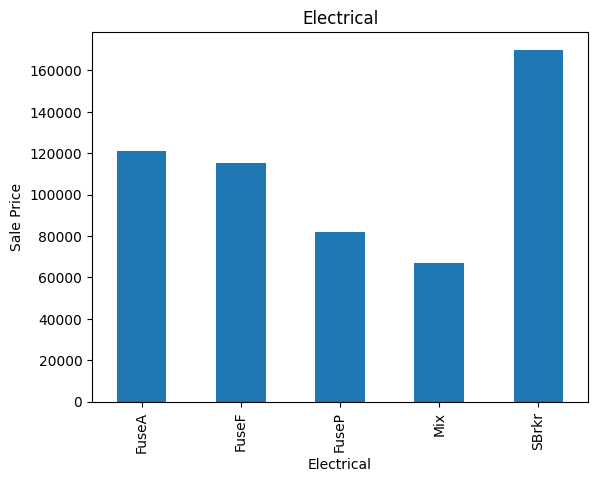

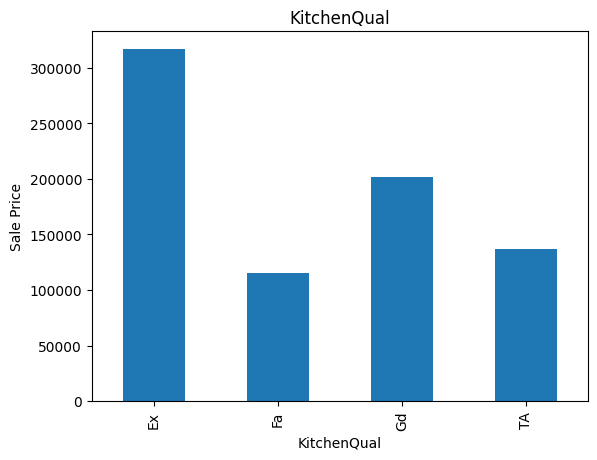

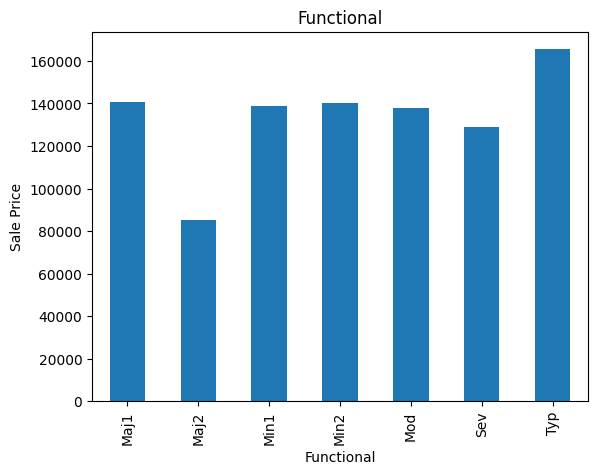

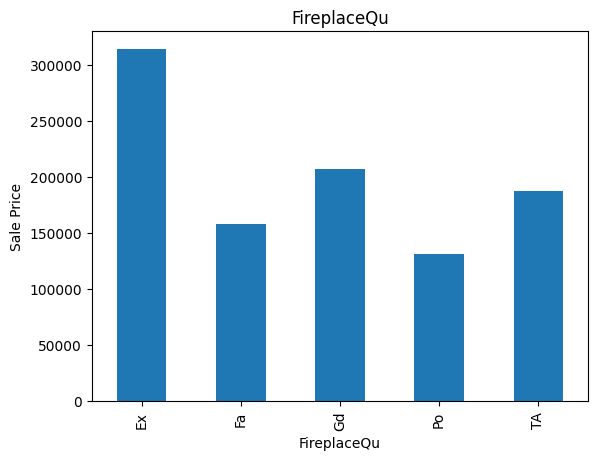

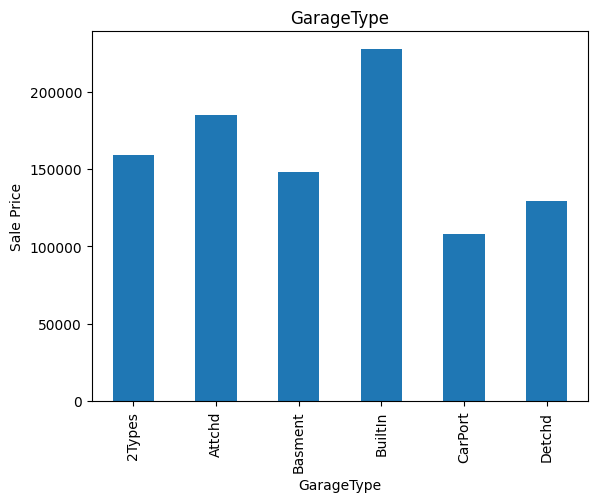

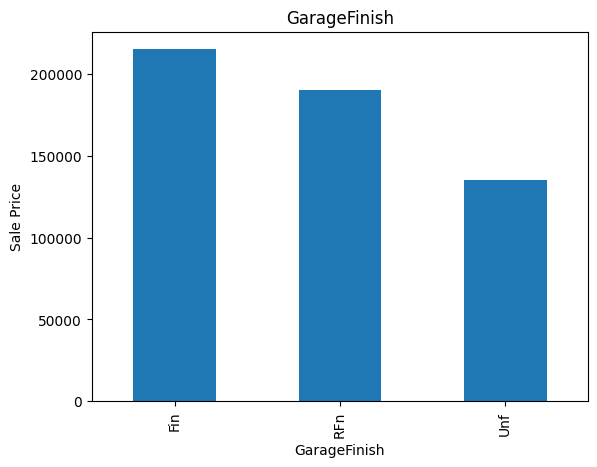

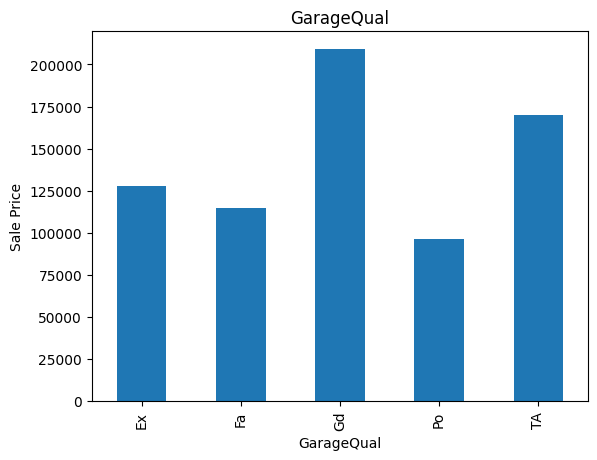

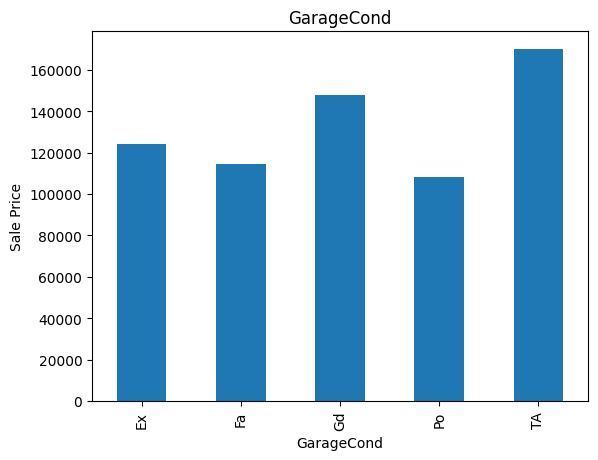

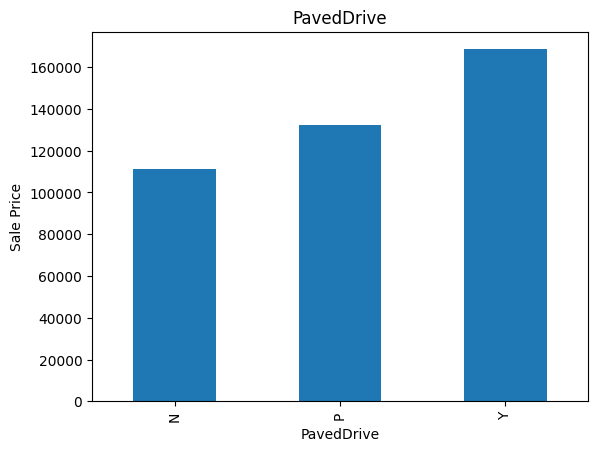

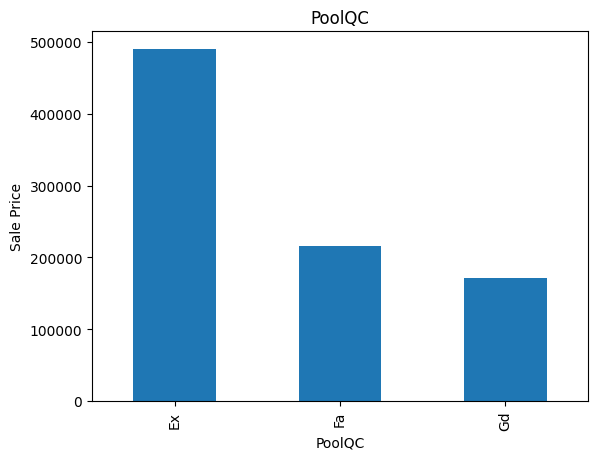

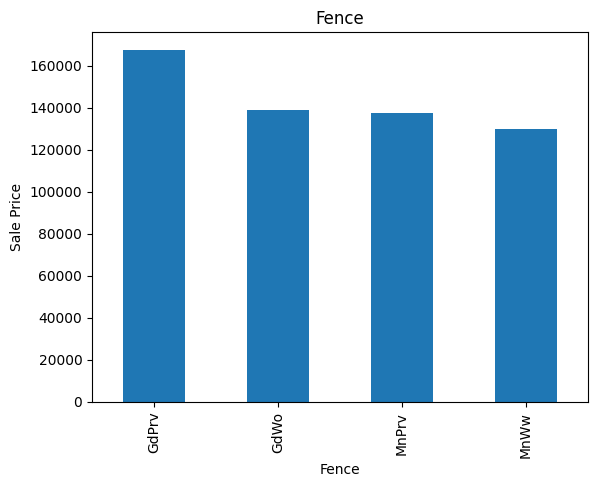

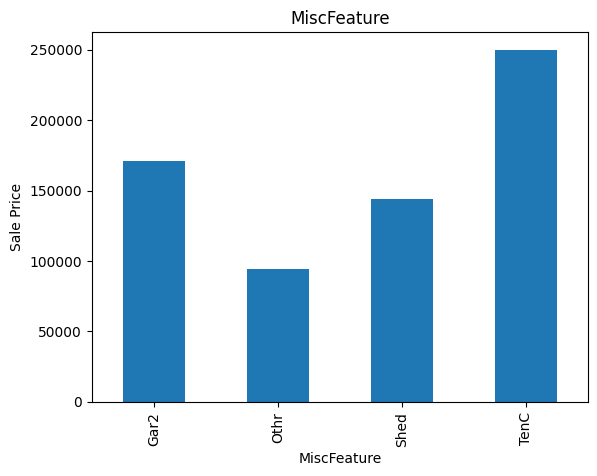

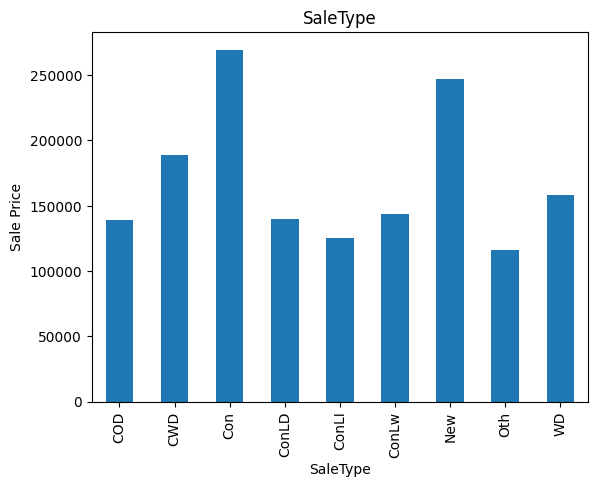

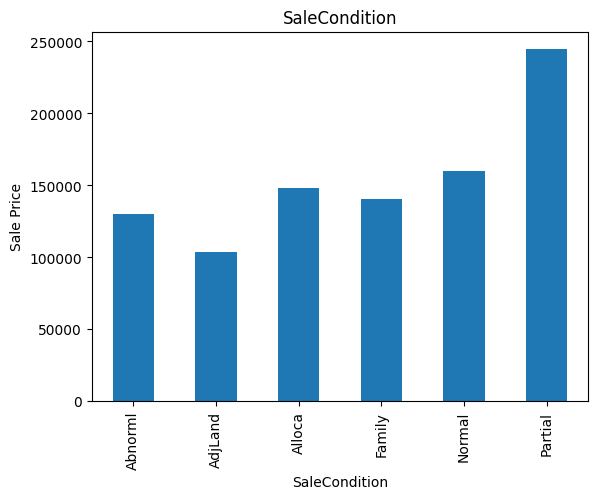

In [31]:
for feature in categorical_features:
  data = dataset.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('Sale Price')
  plt.title(feature)
  plt.show()

##Feature Engineering

###Missing Values

In [35]:
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype=='O']



Alley : 0.9377% missing values
MasVnrType : 0.5973% missing values
BsmtQual : 0.0253% missing values
BsmtCond : 0.0253% missing values
BsmtExposure : 0.026% missing values
BsmtFinType1 : 0.0253% missing values
BsmtFinType2 : 0.026% missing values
FireplaceQu : 0.4726% missing values
GarageType : 0.0555% missing values
GarageFinish : 0.0555% missing values
GarageQual : 0.0555% missing values
GarageCond : 0.0555% missing values
PoolQC : 0.9952% missing values
Fence : 0.8075% missing values
MiscFeature : 0.963% missing values


In [36]:
def replace_cat_feature(dataset, features_nan):
  data=dataset.copy()
  data[features_nan]=data[features_nan].fillna('Missing')
  return data
dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [37]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [39]:
numericals_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
for feature in numericals_nan:
  print("{} : {}% missing values".format(feature, np.round(dataset[feature].isnull().mean(),4)))

LotFrontage : 0.1774% missing values
MasVnrArea : 0.0055% missing values
GarageYrBlt : 0.0555% missing values


In [40]:
for feature in numericals_nan:
  median_value=dataset[feature].median()
  dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
  dataset[feature].fillna(median_value,inplace=True)
dataset[numericals_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [43]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [44]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
  dataset[feature]=dataset['YrSold']-dataset[feature]

In [46]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [47]:
num_features=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']

for feature in num_features:
  dataset[feature]=np.log(dataset[feature])

In [49]:
dataset[['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice']].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea,SalePrice
0,4.174387,9.041922,6.752270,7.444249,12.247694
1,4.382027,9.169518,7.140453,7.140453,12.109011
2,4.219508,9.328123,6.824374,7.487734,12.317167
3,4.094345,9.164296,6.867974,7.448334,11.849398
4,4.430817,9.565214,7.043160,7.695303,12.429216


In [57]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [58]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,Rare,4.174387,9.041922,Rare,Rare,Rare,Rare,Rare,...,Rare,0,2,2008,Rare,Rare,12.247694,0,0,0
1,2,20,Rare,4.382027,9.169518,Rare,Rare,Rare,Rare,Rare,...,Rare,0,5,2007,Rare,Rare,12.109011,0,0,0
2,3,60,Rare,4.219508,9.328123,Rare,Rare,Rare,Rare,Rare,...,Rare,0,9,2008,Rare,Rare,12.317167,0,0,0
3,4,70,Rare,4.094345,9.164296,Rare,Rare,Rare,Rare,Rare,...,Rare,0,2,2006,Rare,Rare,11.849398,0,0,0
4,5,60,Rare,4.430817,9.565214,Rare,Rare,Rare,Rare,Rare,...,Rare,0,12,2008,Rare,Rare,12.429216,0,0,0


In [59]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [60]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,0,4.174387,9.041922,0,0,0,0,0,...,0,0,2,2008,0,0,12.247694,0,0,0
1,2,20,0,4.382027,9.169518,0,0,0,0,0,...,0,0,5,2007,0,0,12.109011,0,0,0
2,3,60,0,4.219508,9.328123,0,0,0,0,0,...,0,0,9,2008,0,0,12.317167,0,0,0
3,4,70,0,4.094345,9.164296,0,0,0,0,0,...,0,0,2,2006,0,0,11.849398,0,0,0
4,5,60,0,4.430817,9.565214,0,0,0,0,0,...,0,0,12,2008,0,0,12.429216,0,0,0
5,6,50,0,4.442651,9.554993,0,0,0,0,0,...,0,700,10,2009,0,0,11.870600,0,0,0
6,7,20,0,4.317488,9.218705,0,0,0,0,0,...,0,0,8,2007,0,0,12.634603,0,0,0
7,8,60,0,4.234107,9.247829,0,0,0,0,0,...,0,350,11,2009,0,0,12.206073,1,0,0
8,9,50,0,3.931826,8.719317,0,0,0,0,0,...,0,0,4,2008,0,0,11.774520,0,0,0
9,10,190,0,3.912023,8.911934,0,0,0,0,0,...,0,0,1,2008,0,0,11.678440,0,0,0


###Feature Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [65]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [66]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.        , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.        , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [68]:
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [71]:
data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.235294,0.0,0.418208,0.366344,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.090909,0.50,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.0,0.495064,0.391317,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.363636,0.25,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.0,0.434909,0.422359,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.727273,0.50,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.0,0.388581,0.390295,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.090909,0.00,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.0,0.513123,0.468761,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,1.000000,0.50,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,0.235294,0.0,0.400718,0.353592,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.636364,0.25,0.0,0.0,0.0,0.0,0.0
1456,1457,12.254863,0.000000,0.0,0.517503,0.453273,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.090909,1.00,0.0,0.0,0.0,0.0,0.0
1457,1458,12.493130,0.294118,0.0,0.423859,0.379597,0.0,0.0,0.0,0.0,...,0.0,0.0,0.16129,0.363636,1.00,0.0,0.0,0.0,0.0,0.0
1458,1459,11.864462,0.000000,0.0,0.434909,0.393688,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.272727,1.00,0.0,0.0,0.0,0.0,0.0


from matplotlib import pyplot as plt
data['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['SalePrice'].plot(kind='hist', bins=20, title='SalePrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['MSSubClass'].plot(kind='hist', bins=20, title='MSSubClass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['LotFrontage'].plot(kind='hist', bins=20, title='LotFrontage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Id', y='SalePrice', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='SalePrice', y='MSSubClass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='MSSubClass', y='LotFrontage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='LotFrontage', y='LotArea', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['SalePrice']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('SalePrice')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['MSSubClass']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('MSSubClass')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['LotFrontage']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('LotFrontage')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Id']
  ys = series['LotArea']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Id')
_ = plt.ylabel('LotArea')

from matplotlib import pyplot as plt
data['Id'].plot(kind='line', figsize=(8, 4), title='Id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['SalePrice'].plot(kind='line', figsize=(8, 4), title='SalePrice')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['MSSubClass'].plot(kind='line', figsize=(8, 4), title='MSSubClass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['LotFrontage'].plot(kind='line', figsize=(8, 4), title='LotFrontage')
plt.gca().spines[['top', 'right']].set_visible(False)

In [74]:
data.to_csv('TraininData',index=False)

##Feature Selection

In [75]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [78]:
dataset=data.copy()

In [79]:
y_train=dataset[['SalePrice']]

In [80]:
X_train=dataset.drop(['Id','SalePrice'],axis=1)

In [90]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=1))
feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=1))

In [91]:
feature_sel_model.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [92]:
selected_features = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_features)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 82
selected features: 10
features with coefficients shrank to zero: 72


In [93]:
selected_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars'],
      dtype='object')

In [95]:
X_train=X_train[selected_features]